Не хватает комментариев и мыслей по ходу решения и нету подборов гипермараметров для моделей

0. Описать задачу словами - Задача классификации жанров музыки на основе признаков о каждом треке
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("music_genres_train.csv")

In [ ]:
from sklearn import preprocessing
data["Artist Name"] = data["Artist Name"].astype(str)

number = preprocessing.LabelEncoder()
data["Artist Name"] = number.fit_transform(data["Artist Name"])

Text(0, 0.5, 'Popularity')

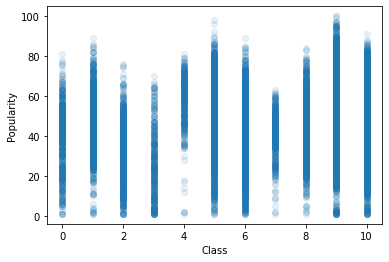

In [ ]:
plt.scatter(data['Class'], data['Popularity'], alpha=0.1)
plt.xlabel('Class')
plt.ylabel('Popularity')

In [ ]:
corr_mat = data.corr()
np.fill_diagonal(corr_mat.values, np.nan)   
corr_mat

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Artist Name,NaN,-0.008630,-0.007430,0.035844,0.004311,0.014449,0.008572,-0.016490,-0.042133,-0.000341,-0.007963,0.019149,0.017747,0.036944,0.017058,-0.005892
Popularity,-0.008630,NaN,0.167213,0.051538,0.005901,0.124915,0.016584,0.031664,-0.125410,-0.167661,-0.072298,0.054824,-0.006050,-0.031118,0.067062,0.161072
danceability,-0.007430,0.167213,NaN,-0.093838,0.006702,0.059723,-0.067135,0.199042,0.009055,-0.200752,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.097681
energy,0.035844,0.051538,-0.093838,NaN,0.015934,0.767869,-0.035880,0.125427,-0.745963,-0.180276,0.195634,0.222998,0.210224,0.245768,0.145281,0.217328
key,0.004311,0.005901,0.006702,0.015934,NaN,0.002660,-0.112452,0.001822,-0.009112,0.001411,0.015125,0.031744,0.013965,0.014547,0.006965,-0.007829
loudness,0.014449,0.124915,0.059723,0.767869,0.002660,NaN,-0.033650,0.096027,-0.612824,-0.343672,0.112022,0.181086,0.164272,0.172010,0.127775,0.177872
mode,0.008572,0.016584,-0.067135,-0.035880,-0.112452,-0.033650,NaN,-0.074609,0.024035,-0.026771,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.044740
speechiness,-0.016490,0.031664,0.199042,0.125427,0.001822,0.096027,-0.074609,NaN,-0.086648,-0.067632,0.070406,0.053885,0.048948,0.005044,0.056237,-0.059349
acousticness,-0.042133,-0.125410,0.009055,-0.745963,-0.009112,-0.612824,0.024035,-0.086648,NaN,0.174139,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.237138
instrumentalness,-0.000341,-0.167661,-0.200752,-0.180276,0.001411,-0.343672,-0.026771,-0.067632,0.174139,NaN,-0.047189,-0.228144,-0.038586,-0.004551,-0.061745,-0.025343


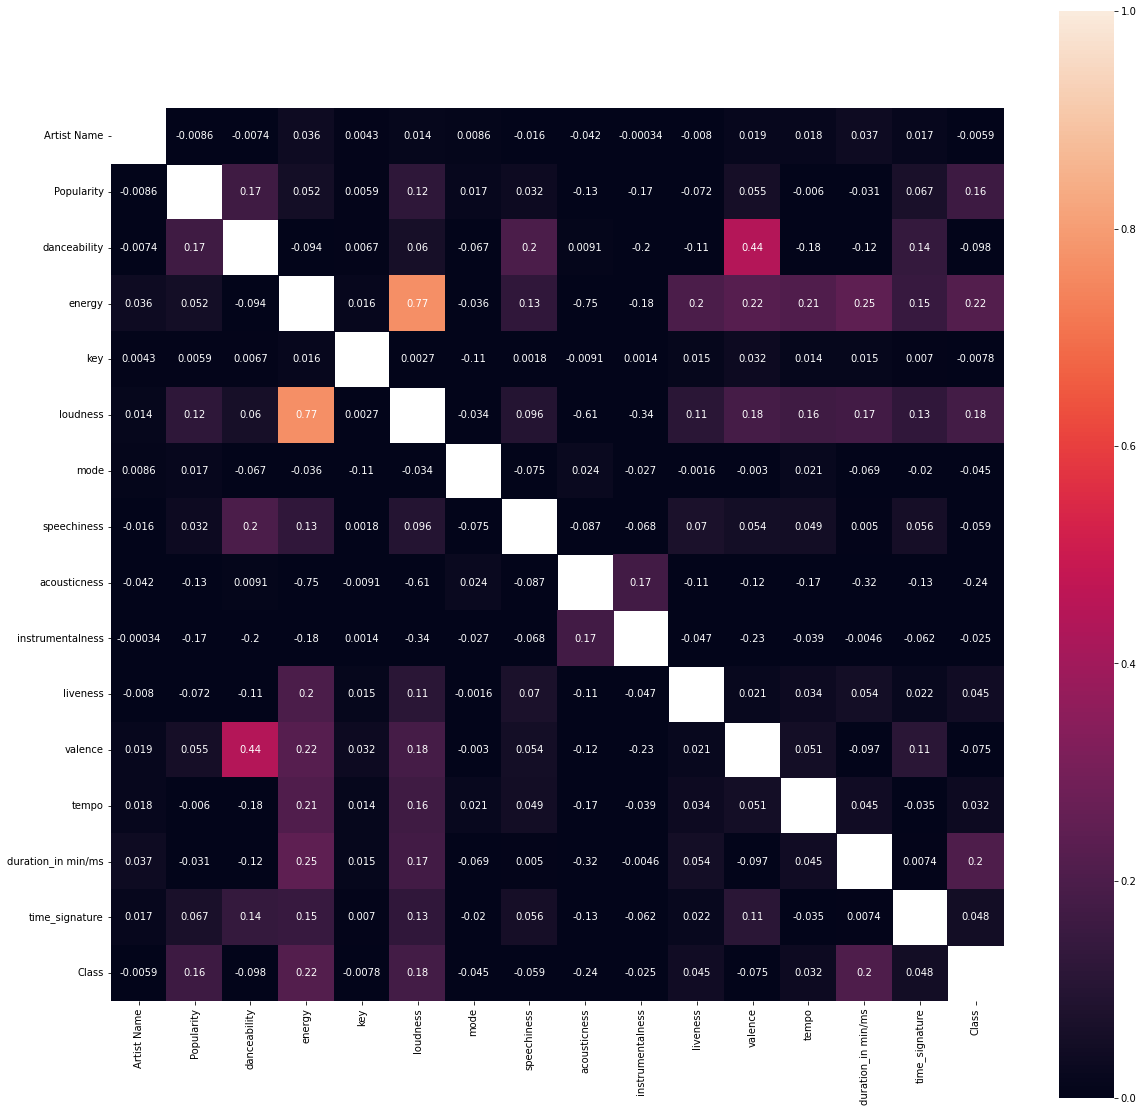

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat, square=True, annot=True, ax=ax, vmin=0, vmax=1)

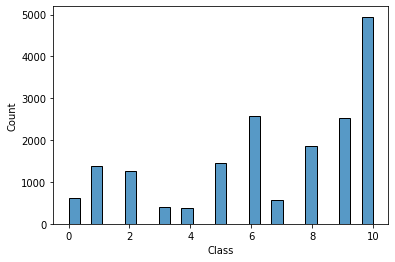

In [ ]:
sns.histplot(x='Class', data=data)

In [ ]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
data['Popularity'].fillna(data['Popularity'].mode().iloc[0], inplace=True)
data['key'].fillna(data['key'].mode().iloc[0], inplace=True)
data['instrumentalness'].fillna(data['instrumentalness'].mode().iloc[0], inplace=True)
data.describe()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,4580.629584,44.452378,0.543433,0.662777,6.069682,-7.910660,0.636753,0.079707,0.247082,0.134402,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,2651.222266,17.222691,0.166268,0.235373,3.030700,4.049151,0.480949,0.083576,0.310632,0.275238,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,2279.000000,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000109,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,4584.000000,43.000000,0.545000,0.700000,7.000000,-7.016000,1.000000,0.047400,0.081400,0.000343,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,6925.000000,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.056600,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,9148.000000,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Artist Name,Class,Popularity,acousticness,danceability,duration_in min/ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04
mean,-5.349997e-17,-2.497323e-17,9.663555e-17,-4.422137e-17,-4.935421e-16,-3.652212e-17,1.883357e-16,2.408486e-17,8.469183e-17,7.896674e-17,2.037342e-16,-5.725089e-17,-8.844275e-17,-1.054206e-16,6.968815e-17,-1.437195e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.727743e+00,-2.088480e+00,-2.522973e+00,-7.954154e-01,-2.909952e+00,-1.792531e+00,-2.815766e+00,-4.883071e-01,-1.672776e+00,-1.157389e+00,-7.913101e+00,-1.323951e+00,-6.844902e-01,-3.113343e+00,-8.085991e+00,-1.948034e+00
25%,-8.681391e-01,-5.289403e-01,-6.649587e-01,-7.815727e-01,-6.702005e-01,-3.072393e-01,-6.533311e-01,-4.879148e-01,-6.829057e-01,-6.197404e-01,-4.018967e-01,-1.323951e+00,-5.373189e-01,-7.778612e-01,2.100597e-01,-7.877278e-01
50%,1.271269e-03,4.067838e-01,-8.432935e-02,-5.333692e-01,9.423202e-03,7.514606e-02,1.581456e-01,-4.870646e-01,3.069647e-01,-4.218906e-01,2.209500e-01,7.552728e-01,-3.865580e-01,-8.649516e-02,2.100597e-01,-2.168440e-02
75%,8.842602e-01,1.030600e+00,6.704888e-01,6.017351e-01,6.950613e-01,4.620586e-01,8.379166e-01,-2.826706e-01,6.369215e-01,3.883515e-01,6.721557e-01,7.552728e-01,3.940128e-02,6.542089e-01,2.100597e-01,7.735020e-01
max,1.722741e+00,1.030600e+00,3.225258e+00,2.410949e+00,2.679803e+00,1.139791e+01,1.432716e+00,3.130375e+00,1.626792e+00,5.048814e+00,2.288297e+00,7.552728e-01,1.047301e+01,3.205540e+00,2.975410e+00,2.080772e+00


In [ ]:
del data['Track Name']
del data['Artist Name']
data.shape

(17996, 15)

In [ ]:
data_stand.shape

(17996, 17)

In [ ]:
data.shape

(17996, 15)

In [ ]:
from sklearn.model_selection import train_test_split
X = data_stand.drop(['Class', 'Track Name', 'Artist Name'], axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
N_train, _ = x_train.shape
N_test,  _ = x_test.shape

N_train, N_test

(10797, 7199)

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       256
           1       0.05      0.03      0.03       539
           2       0.48      0.28      0.36       547
           3       0.83      0.59      0.69       180
           4       0.52      0.62      0.57       147
           5       0.67      0.63      0.65       577
           6       0.27      0.20      0.23      1005
           7       0.80      0.92      0.86       217
           8       0.53      0.45      0.48       745
           9       0.43      0.46      0.44      1027
          10       0.42      0.59      0.49      1959

    accuracy                           0.45      7199
   macro avg       0.51      0.50      0.50      7199
weighted avg       0.44      0.45      0.44      7199



<Figure size 2520x1800 with 0 Axes>

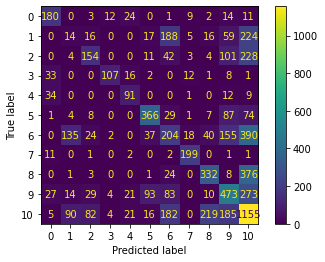

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors = 19, algorithm='ball_tree', leaf_size=35, weights='distance')
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn.classes_)
disp.plot()


              precision    recall  f1-score   support

           0       0.68      0.83      0.75       256
           1       0.05      0.02      0.03       539
           2       0.56      0.31      0.40       547
           3       0.86      0.71      0.78       180
           4       0.64      0.65      0.64       147
           5       0.68      0.70      0.69       577
           6       0.32      0.29      0.31      1005
           7       0.92      0.94      0.93       217
           8       0.61      0.54      0.57       745
           9       0.52      0.54      0.53      1027
          10       0.46      0.62      0.53      1959

    accuracy                           0.51      7199
   macro avg       0.57      0.56      0.56      7199
weighted avg       0.49      0.51      0.50      7199



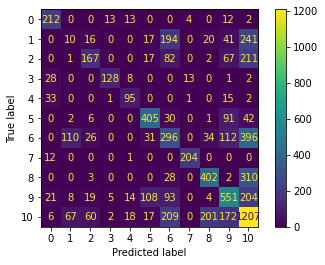

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120, criterion = 'entropy', max_features= "log2")
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rfc.classes_)
disp.plot()


              precision    recall  f1-score   support

           0       0.59      0.56      0.57       256
           1       0.08      0.11      0.09       539
           2       0.32      0.27      0.29       547
           3       0.65      0.68      0.66       180
           4       0.49      0.52      0.51       147
           5       0.57      0.54      0.56       577
           6       0.20      0.21      0.21      1005
           7       0.86      0.91      0.89       217
           8       0.44      0.43      0.43       745
           9       0.38      0.38      0.38      1027
          10       0.38      0.35      0.37      1959

    accuracy                           0.37      7199
   macro avg       0.45      0.45      0.45      7199
weighted avg       0.38      0.37      0.38      7199



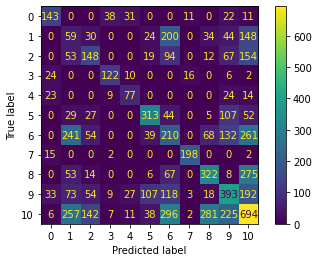

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", splitter="best")
dtc.fit(x_train, y_train)
y_predict = dtc.predict(x_test)
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=dtc.classes_)
disp.plot()


## Подбор параметров

В ходе работы, для трех классификаторов были опробованы разные наборы гиперпараметров для выбора лучших, далее они были использованы в финальной классификации

## Выводы
Задача определения жанра музыки плохо поддается классификации, даже при проведенном препроцессинге
(кодирование категориальных признаков и нормализация данных), результаты работы алгоритмов классификации остаются очень
низкими. По матрицам ошибок можно заметить, что некоторые классы (1, 6, 8, 9) стабильно плохо определяются классификаторами, а класс 10 явно больше по наполненности, чем все остальные, это может и быть частичной причиной низкого качества, возможно, выравнивание представленности классов поможет повысить точность классификации в дальнейшем. 